# Step Two: Factor Screening (Forseeablility Analysis)

The purpose of this part is to rolling over different sectors to obtain the factor return's Spearman ranked ICs (the correlation between factor ranks and the future return). And then, screen the stable and significant factors in different industry sectors. Alphalens here is a fantastic toolkit to visualize the correlations as well as other computations. 

From the heatmap, we can see the historical turnover on such factor returns. **Stability is preferable.** The more stable, the more reliable of this factor.

From the average IC along separate sectors, we can see the significance of the factors along such sector. **Larger absolute value is appreciable.** The greater the absolute number, the more significant of this factor.

The data source is Chinese A market. The factors we tested are:
    
    * 'total_turnover'
    * 'volume'
    * 'market_cap'
    * 'a_share_market_val_2'
    * 'cash_received_from_sales_of_goods'
    * 'pb_ratio'
    * 'net_profit'
    * 'ps_ratio'
    
Time line: 01/01/2012 - 02/29/2016

In [1]:
from rqdata_utils import *
import pandas
import numpy as np
import scipy as sp
import alphalens as al
%matplotlib inline

/Users/xiayuxuan/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
price_df,instrument_df,equity_df = get_price_instrument_equity("cn_stock_price_2012_2018.csv","cn_instrument_info_2012_2018.csv","cn_equity_daily_2012_2018.csv","sectorCode")

/Users/xiayuxuan/Codes/AlphaTrading/rqdata_utils.py:12: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  price_df = price_df.sortlevel(axis=1)


In [16]:
price_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,601933.XSHG,601939.XSHG,601958.XSHG,601988.XSHG,601989.XSHG,601991.XSHG,601992.XSHG,601996.XSHG,601998.XSHG,601999.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,5.1224,6.0525,7.91,3.86,2.6766,4.6067,0.7598,5.3434,3.6575,5.6769,...,3.4448,3.2267,10.5774,2.1023,4.8762,4.5951,3.8201,1.9981,3.2551,7.3631
2012-01-05,5.2001,5.9865,7.33,3.86,2.6436,4.3733,0.7288,5.0471,3.6575,5.1148,...,3.4252,3.2841,10.2213,2.1384,4.6739,4.5426,3.6308,1.8740,3.3448,7.1971
2012-01-06,5.1866,5.9122,7.36,3.86,2.6370,4.2467,0.7334,5.3487,3.6575,5.2366,...,3.3884,3.3343,10.3368,2.1384,4.5871,4.6213,3.7633,1.9145,3.3856,7.3045
2012-01-09,5.3319,6.1186,7.70,3.86,2.7096,4.4133,0.7702,5.8830,3.6575,5.4708,...,3.4517,3.3988,10.8950,2.1528,4.7606,4.6563,3.9716,2.0124,3.4346,7.6170
2012-01-10,5.3319,6.2177,8.16,3.86,2.8085,4.5200,0.8092,6.1317,3.6575,5.7144,...,3.6438,3.4275,11.9826,2.1600,5.0112,4.6126,4.2272,2.2129,3.4835,7.9099


In [17]:
instrument_df.head()

,abbrevSymbol,exchange,industryCode,industryName,sectorCode,sectorName,shenwanIndustryCode,shenwanIndustryName
bookId,,,,,,,,
000001.XSHE,PAYH,XSHE,J66,货币金融服务,Financials,金融,801780.INDX,银行
000002.XSHE,WKA,XSHE,K70,房地产业,Financials,金融,801180.INDX,房地产
000004.XSHE,GNKJ,XSHE,C27,医药制造业,HealthCare,医疗保健,801150.INDX,医药生物
000005.XSHE,SJXY,XSHE,N77,生态保护和环境治理业,Industrials,工业,801160.INDX,公用事业
000006.XSHE,SZYA,XSHE,K70,房地产业,Financials,金融,801180.INDX,房地产


In [18]:
equity_df.head()

return   close  total_turnover      volume  \
date       order_book_id                                                 
2012-01-04 000001.XSHE   -0.027582  5.1224    2.275637e+08  40894428.0   
           000002.XSHE   -0.018742  6.0525    3.559891e+08  47432958.0   
           000004.XSHE   -0.022250  7.9100    3.763833e+06    465469.0   
           000005.XSHE    0.000000  3.8600    0.000000e+00         0.0   
           000006.XSHE   -0.009756  2.6766    7.619286e+06   2513811.0   

                            week   month report_quarter    market_cap  \
date       order_book_id                                                
2012-01-04 000001.XSHE    0.5775  0.4331            NaN           NaN   
           000002.XSHE    0.3711  0.4030         2011q3  8.059489e+10   
           000004.XSHE    0.5720  0.7506         2011q3  6.642556e+08   
           000005.XSHE    0.0000  0.0000         2011q3  3.529328e+09   
           000006.XSHE    0.1416  0.1667         2011q3  4.015370e+09   

                          a_share_market_val_2  \
date       order_book_id                         
2012-01-04 000001.XSHE                     NaN   
           000002.XSHE            7.082120e+10   
           000004.XSHE            6.634549e+08   
           000005.XSHE            3.527048e+09   
           000006.XSHE            3.929464e+09   

                          cash_received_from_sales_of_goods  pb_ratio  \
date       order_book_id                                                
2012-01-04 000001.XSHE                                  NaN       NaN   
           000002.XSHE                         7.516785e+10    1.5216   
           000004.XSHE                         5.949968e+07    8.8175   
           000005.XSHE                         2.565851e+07    5.3480   
           000006.XSHE                         2.531436e+09    1.4348   

                            net_profit  ps_ratio   sectorCode  
date       order_book_id                                       
2012-01-04 000001.XSHE             NaN       NaN   Financials  
           000002.XSHE    4.106349e+09    0.8679   Financials  
           000004.XSHE    4.500363e+06   37.5796   HealthCare  
           000005.XSHE    1.365665e+07 -347.2191  Industrials  
           000006.XSHE    2.763917e+08    1.4139   Financials

In [19]:
factor_columns = [equity_df.columns[i] for i in (2,3,7,8,9,10,11,12)]
factor_columns

['total_turnover',
 'volume',
 'market_cap',
 'a_share_market_val_2',
 'cash_received_from_sales_of_goods',
 'pb_ratio',
 'net_profit',
 'ps_ratio']

In [20]:
factor_list = []
for col in factor_columns:
#     print("factor: {}".format(col))
    factor_list.append(equity_df[col])
sectors = equity_df['sectorCode']

In [21]:
# ic_list = []
# for my_factor in factor_list:
#     factor_data = al.utils.get_clean_factor_and_forward_returns(factor=my_factor,
#                                                             prices=price_df,
#                                                             groupby=sectors,
#                                                             periods=(1,21,63),
#                                                             max_loss=1)
#     ic = al.performance.mean_information_coefficient(factor_data,group_adjust=False,by_group=True,by_time=None)
#     print("#######################################################")
#     print("factor: {}".format(my_factor.name))
#     print(ic)
#     ic_list.append(al.performance.mean_information_coefficient(factor_data,group_adjust=False,by_group=True,by_time=None))

In [22]:
# ic_list[0]

In [23]:
# result = pd.concat(ic_list, keys=factor_columns)

In [24]:
# result.index = result.index.set_names(['factor','group'])
# result

In [25]:
# result.to_csv("factor_ic_analysis.csv")
# result2 = result.copy()

Dropped 60.5% entries from factor data: 60.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: total_turnover
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.050780 -0.105837 -0.168270
ConsumerStaples           -0.062219 -0.128605 -0.200769
Energy                    -0.054586 -0.120916 -0.160159
Financials                -0.045652 -0.099302 -0.144769
HealthCare                -0.030701 -0.067984 -0.112590
Industrials               -0.060969 -0.119908 -0.167331
InformationTechnology     -0.041213 -0.091670 -0.155766
Materials                 -0.062907 -0.140107 -0.203241
TelecommunicationServices -0.057393 -0.110895 -0.107004
Utilities                 -0.066647 -0.122049 -0.162564


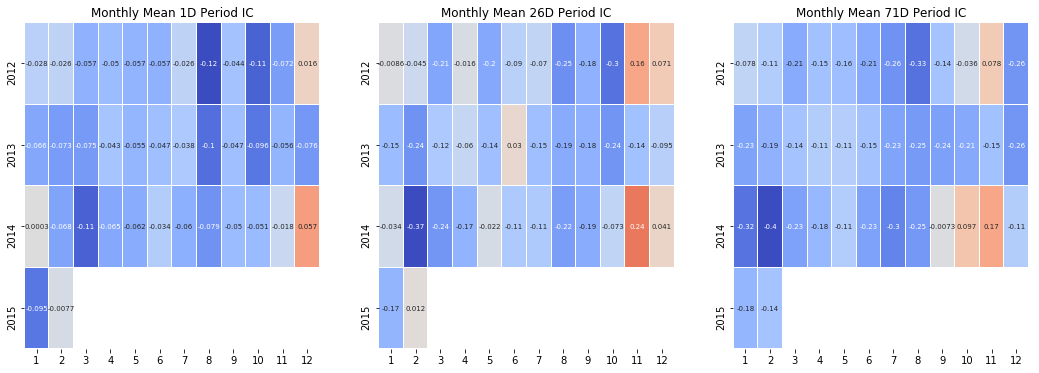

Dropped 60.5% entries from factor data: 60.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: volume
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.037295 -0.058156 -0.092401
ConsumerStaples           -0.047805 -0.067405 -0.091976
Energy                    -0.052006 -0.064111 -0.057444
Financials                -0.039662 -0.073485 -0.107851
HealthCare                -0.018066 -0.028057 -0.053726
Industrials               -0.053038 -0.088630 -0.116360
InformationTechnology     -0.030878 -0.055499 -0.101930
Materials                 -0.051232 -0.094583 -0.127172
TelecommunicationServices -0.036253 -0.016537 -0.073930
Utilities                 -0.052768 -0.082672 -0.090794


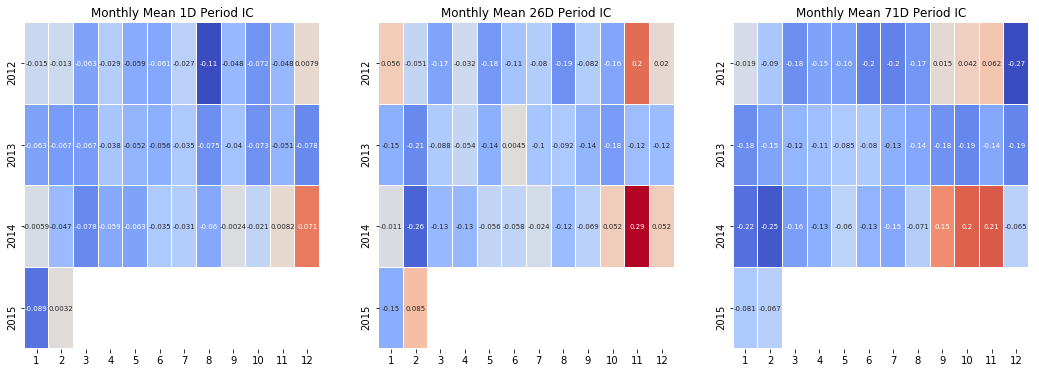

Dropped 61.3% entries from factor data: 61.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: market_cap
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.018835 -0.078901 -0.131109
ConsumerStaples           -0.023893 -0.096738 -0.162302
Energy                    -0.024518 -0.111238 -0.209925
Financials                -0.018298 -0.071274 -0.120285
HealthCare                -0.017402 -0.074046 -0.123430
Industrials               -0.025877 -0.092721 -0.143395
InformationTechnology     -0.018201 -0.065416 -0.133985
Materials                 -0.029563 -0.121755 -0.199127
TelecommunicationServices -0.024319 -0.116732 -0.226654
Utilities                 -0.021676 -0.073649 -0.104733


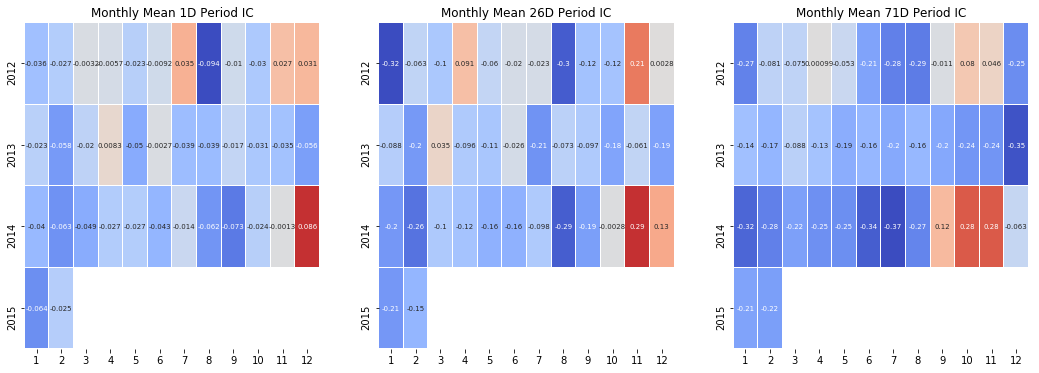

Dropped 61.3% entries from factor data: 61.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: a_share_market_val_2
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.018433 -0.081129 -0.140175
ConsumerStaples           -0.022445 -0.092459 -0.156749
Energy                    -0.019431 -0.094837 -0.202708
Financials                -0.014397 -0.063487 -0.104982
HealthCare                -0.017168 -0.068474 -0.110678
Industrials               -0.023164 -0.087877 -0.137444
InformationTechnology     -0.015806 -0.063492 -0.128198
Materials                 -0.027246 -0.116804 -0.191668
TelecommunicationServices -0.019455 -0.047665 -0.076848
Utilities                 -0.016912 -0.075629 -0.109340


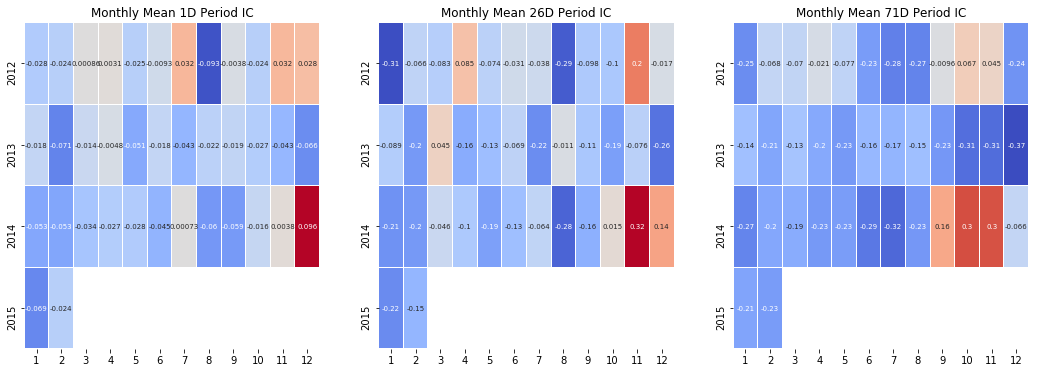

Dropped 61.3% entries from factor data: 61.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: cash_received_from_sales_of_goods
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.001815 -0.034481 -0.059783
ConsumerStaples            0.000725 -0.028034 -0.041638
Energy                    -0.017760 -0.087964 -0.162990
Financials                 0.001328 -0.019361 -0.042642
HealthCare                -0.008346 -0.048026 -0.075454
Industrials               -0.004204 -0.030179 -0.061646
InformationTechnology     -0.004348 -0.034984 -0.076958
Materials                 -0.009824 -0.063406 -0.109504
TelecommunicationServices -0.001946  0.012646 -0.032101
Utilities                 -0.005165 -0.026397 -0.029401


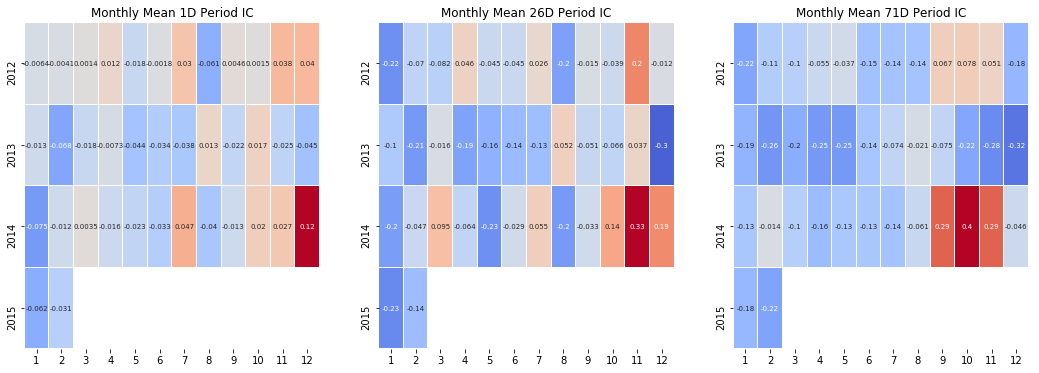

Dropped 61.3% entries from factor data: 61.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: pb_ratio
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.027124 -0.042102 -0.059023
ConsumerStaples           -0.029886 -0.072579 -0.108715
Energy                    -0.002687  0.013856  0.054219
Financials                -0.023944 -0.050893 -0.069568
HealthCare                -0.017654 -0.002850 -0.002061
Industrials               -0.022245 -0.043381 -0.058918
InformationTechnology     -0.021405 -0.046982 -0.064337
Materials                 -0.019554 -0.035837 -0.055802
TelecommunicationServices -0.004864  0.014591  0.066148
Utilities                 -0.025954 -0.068082 -0.105200


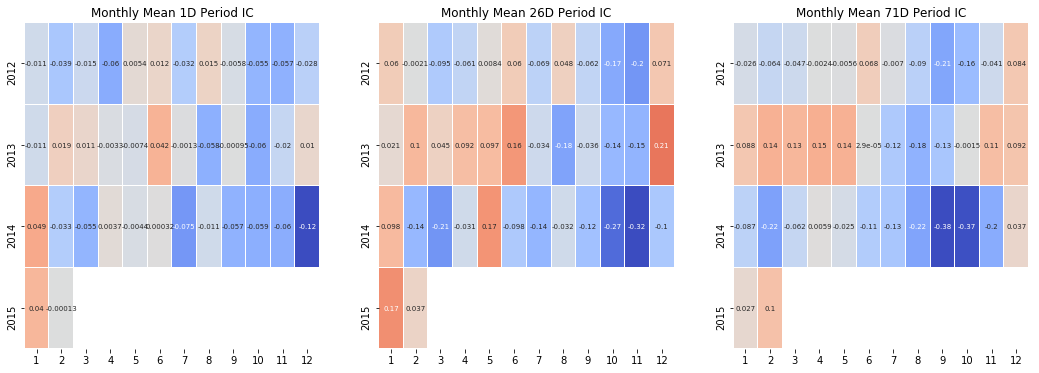

Dropped 61.3% entries from factor data: 61.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: net_profit
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary      0.003644 -0.026376 -0.054474
ConsumerStaples            0.000936 -0.033766 -0.071628
Energy                    -0.005624 -0.062272 -0.130422
Financials                 0.004983 -0.010518 -0.031329
HealthCare                 0.002690 -0.017971 -0.040844
Industrials                0.004861 -0.009986 -0.024660
InformationTechnology      0.002995 -0.015399 -0.056133
Materials                  0.007104 -0.019409 -0.065781
TelecommunicationServices -0.001946  0.012646 -0.032101
Utilities                  0.003231 -0.014235 -0.032508


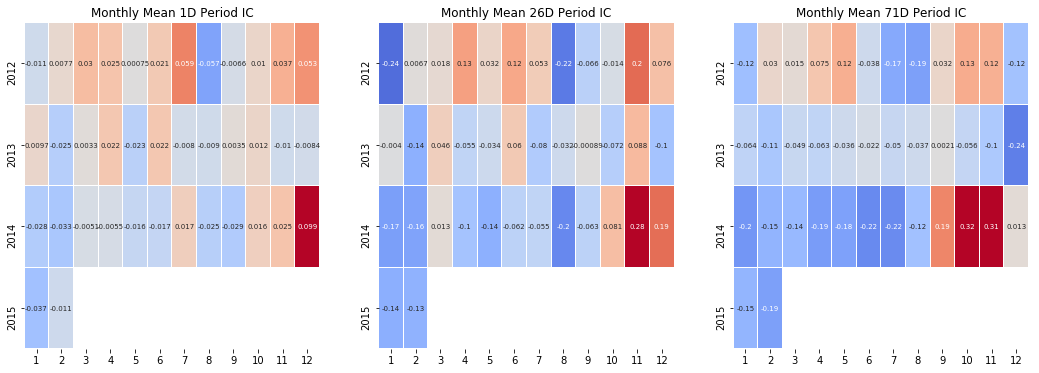

Dropped 61.3% entries from factor data: 61.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: ps_ratio
                                 1D       26D       71D
group                                                  
ConsumerDiscretionary     -0.011445 -0.013958 -0.013101
ConsumerStaples           -0.019736 -0.049908 -0.097307
Energy                     0.009668  0.042630  0.078825
Financials                -0.012994 -0.013693 -0.012694
HealthCare                -0.004363 -0.000633 -0.004362
Industrials               -0.008484 -0.009811  0.000346
InformationTechnology     -0.009862 -0.012860 -0.013093
Materials                 -0.008185 -0.002388  0.002706
TelecommunicationServices -0.002918 -0.025292  0.023346
Utilities                 -0.011148 -0.026585 -0.059007


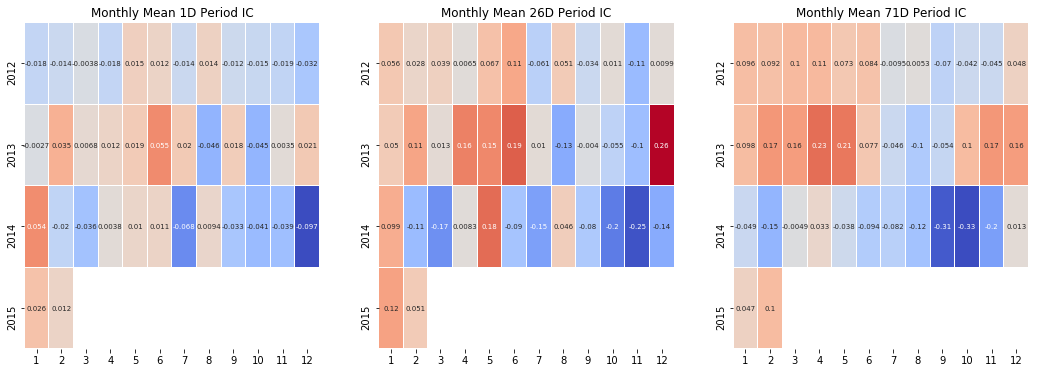

In [29]:
ic_list = []
monthly_ic_list = []
for my_factor in factor_list:
    factor_data = al.utils.get_clean_factor_and_forward_returns(factor=my_factor,
                                                            prices=price_df,
                                                            groupby=sectors,
                                                            periods=(1,21,63),
                                                            max_loss=1)
    mean_ic = al.performance.mean_information_coefficient(factor_data,group_adjust=False,by_group=True,by_time=None)
    mean_monthly_ic = al.performance.mean_information_coefficient(factor_data, by_time='M')
    print("#######################################################")
    print("factor: {}".format(my_factor.name))
    print(mean_ic)
    al.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)
    plt.show()
    ic_list.append(mean_ic)
    monthly_ic_list.append(mean_monthly_ic)


result = pd.concat(ic_list, keys=factor_columns)
result.index = result.index.set_names(['factor','group'])
result.to_csv("factor_ic_analysis.csv")

In [1]:
from rqdata_utils import *
import pandas
import numpy as np
import scipy as sp
import alphalens as al
%matplotlib inline

price_df,instrument_df,equity_df = get_price_instrument_equity("cn_stock_price_2012_2018.csv",
                                                               "cn_instrument_info_2012_2018.csv",
                                                               "cn_equity_daily_2012_2018.csv",
                                                               "sectorCode")

factor_columns = [equity_df.columns[i] for i in (2,3,7,8,9,10,11,12)]
# mean_ic_df, monthly_ic_list = ic_analysis(equity_df, price_df, factor_columns,
#                                           group_column='sectorCode', periods=(1,22,66),
#                                          group_adjust=True)

Dropped 60.7% entries from factor data: 60.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: total_turnover
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.051102 -0.108076 -0.171324
ConsumerStaples           -0.062448 -0.130107 -0.204937
Energy                    -0.054439 -0.122014 -0.161766
Financials                -0.044632 -0.100452 -0.146099
HealthCare                -0.030850 -0.069251 -0.115974
Industrials               -0.061291 -0.121612 -0.170640
InformationTechnology     -0.041229 -0.093634 -0.159565
Materials                 -0.063084 -0.143148 -0.207066
TelecommunicationServices -0.058708 -0.134313 -0.117417
Utilities                 -0.067254 -0.122855 -0.166621


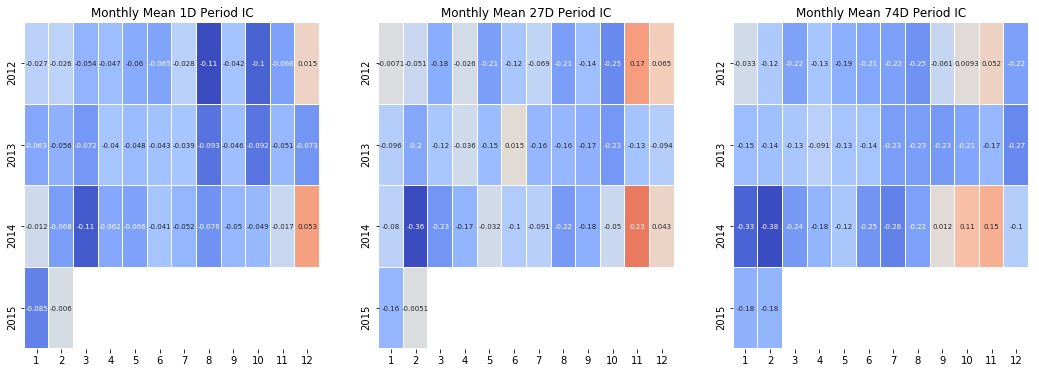

Dropped 60.7% entries from factor data: 60.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: volume
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.037667 -0.059468 -0.094165
ConsumerStaples           -0.048410 -0.068356 -0.093886
Energy                    -0.051893 -0.064026 -0.055889
Financials                -0.038688 -0.074528 -0.109477
HealthCare                -0.018340 -0.028735 -0.055775
Industrials               -0.053396 -0.089947 -0.118092
InformationTechnology     -0.030964 -0.057127 -0.104678
Materials                 -0.051582 -0.096782 -0.129183
TelecommunicationServices -0.037444 -0.032290 -0.075342
Utilities                 -0.053301 -0.083261 -0.093011


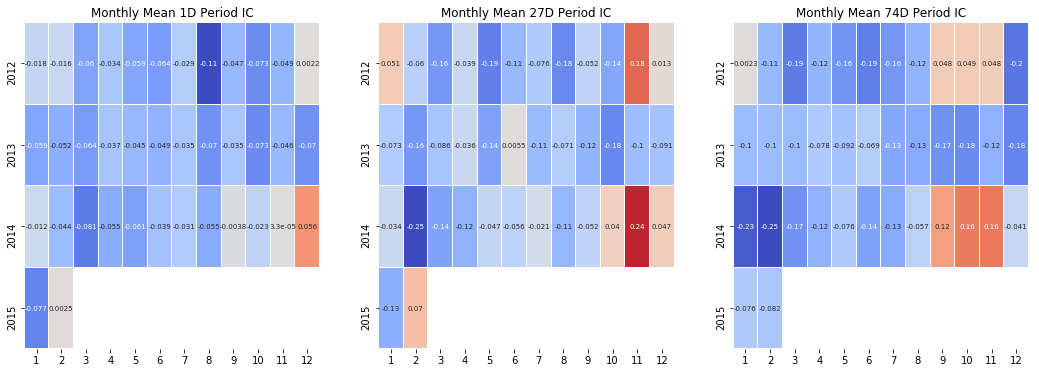

Dropped 61.5% entries from factor data: 61.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: market_cap
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.018888 -0.080341 -0.133759
ConsumerStaples           -0.023722 -0.097874 -0.166954
Energy                    -0.023261 -0.112731 -0.212733
Financials                -0.017722 -0.072242 -0.122104
HealthCare                -0.017292 -0.075381 -0.125740
Industrials               -0.025835 -0.094294 -0.146895
InformationTechnology     -0.018093 -0.067093 -0.138578
Materials                 -0.029321 -0.125070 -0.203400
TelecommunicationServices -0.025440 -0.124528 -0.216243
Utilities                 -0.022262 -0.074952 -0.107345


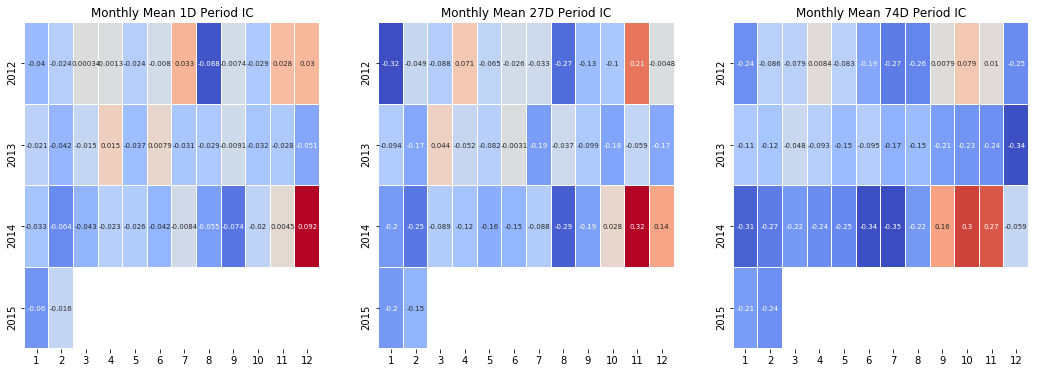

Dropped 61.5% entries from factor data: 61.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: a_share_market_val_2
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.018562 -0.082794 -0.143164
ConsumerStaples           -0.022271 -0.093489 -0.161549
Energy                    -0.018494 -0.096883 -0.205193
Financials                -0.013807 -0.064450 -0.106304
HealthCare                -0.017121 -0.069427 -0.112726
Industrials               -0.023131 -0.089449 -0.140666
InformationTechnology     -0.015780 -0.065053 -0.132862
Materials                 -0.027031 -0.119905 -0.196118
TelecommunicationServices -0.020548 -0.050881 -0.065558
Utilities                 -0.017542 -0.077502 -0.112182


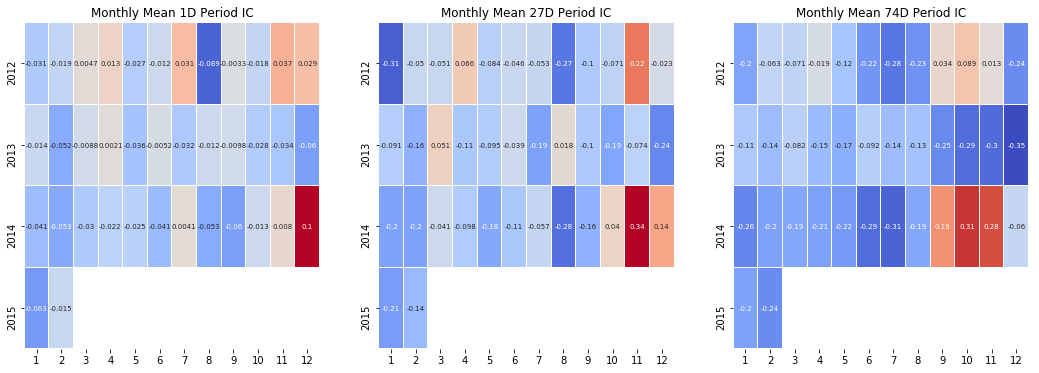

Dropped 61.5% entries from factor data: 61.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: cash_received_from_sales_of_goods
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.001885 -0.034700 -0.061169
ConsumerStaples            0.000898 -0.027942 -0.042588
Energy                    -0.016925 -0.089457 -0.163763
Financials                 0.001896 -0.020211 -0.044037
HealthCare                -0.008519 -0.048294 -0.077190
Industrials               -0.004109 -0.030846 -0.063905
InformationTechnology     -0.004314 -0.035571 -0.080046
Materials                 -0.009702 -0.065223 -0.112192
TelecommunicationServices -0.002935  0.009785 -0.020548
Utilities                 -0.005260 -0.027291 -0.029942


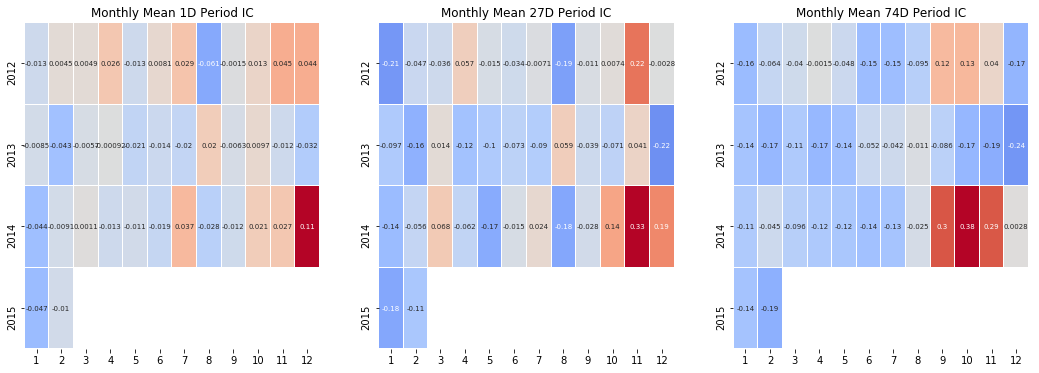

Dropped 61.5% entries from factor data: 61.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: pb_ratio
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.027197 -0.043313 -0.060119
ConsumerStaples           -0.030148 -0.074140 -0.111045
Energy                    -0.003091  0.014940  0.055148
Financials                -0.024164 -0.050830 -0.070645
HealthCare                -0.017553 -0.002491 -0.001724
Industrials               -0.022498 -0.044155 -0.059747
InformationTechnology     -0.021265 -0.047565 -0.065131
Materials                 -0.019598 -0.036778 -0.056351
TelecommunicationServices -0.002935  0.011742  0.052838
Utilities                 -0.025879 -0.068818 -0.108290


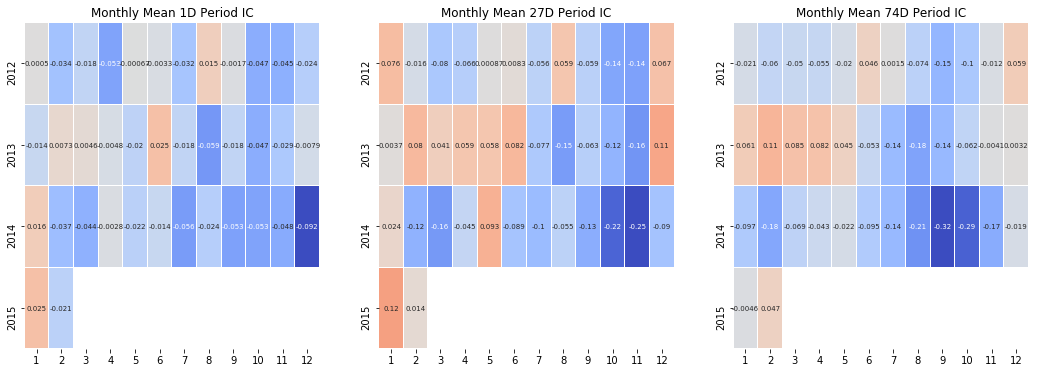

Dropped 61.5% entries from factor data: 61.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: net_profit
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary      0.003778 -0.026720 -0.056531
ConsumerStaples            0.001290 -0.033434 -0.074371
Energy                    -0.004868 -0.063919 -0.130060
Financials                 0.005653 -0.010642 -0.032264
HealthCare                 0.002852 -0.017685 -0.042126
Industrials                0.005001 -0.009975 -0.025835
InformationTechnology      0.003133 -0.015473 -0.058934
Materials                  0.007519 -0.020136 -0.069292
TelecommunicationServices -0.002935  0.009785 -0.020548
Utilities                  0.002596 -0.014968 -0.035609


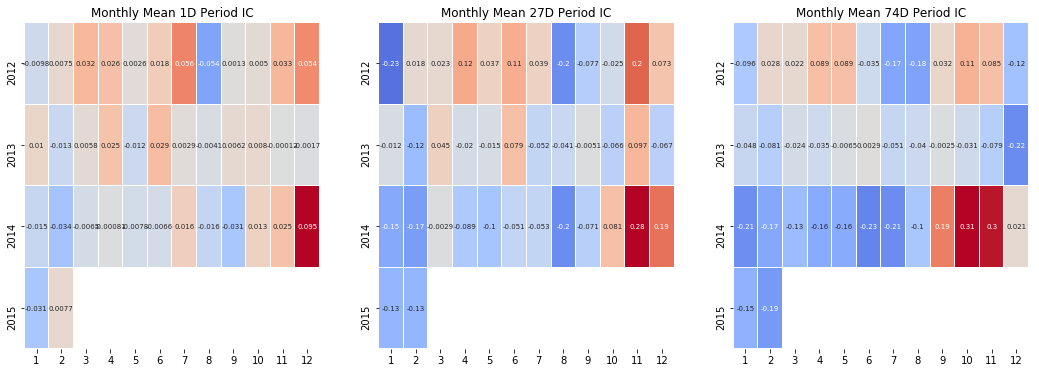

Dropped 61.5% entries from factor data: 61.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
#######################################################
factor: ps_ratio
                                 1D       27D       74D
group                                                  
ConsumerDiscretionary     -0.011207 -0.014418 -0.013374
ConsumerStaples           -0.019759 -0.051108 -0.100983
Energy                     0.009290  0.043843  0.078257
Financials                -0.013181 -0.012980 -0.012779
HealthCare                -0.004225 -0.001030 -0.004181
Industrials               -0.008441 -0.009612  0.001420
InformationTechnology     -0.009872 -0.012834 -0.013395
Materials                 -0.008217 -0.002217  0.003179
TelecommunicationServices -0.001957 -0.021526  0.012720
Utilities                 -0.011484 -0.026654 -0.061382


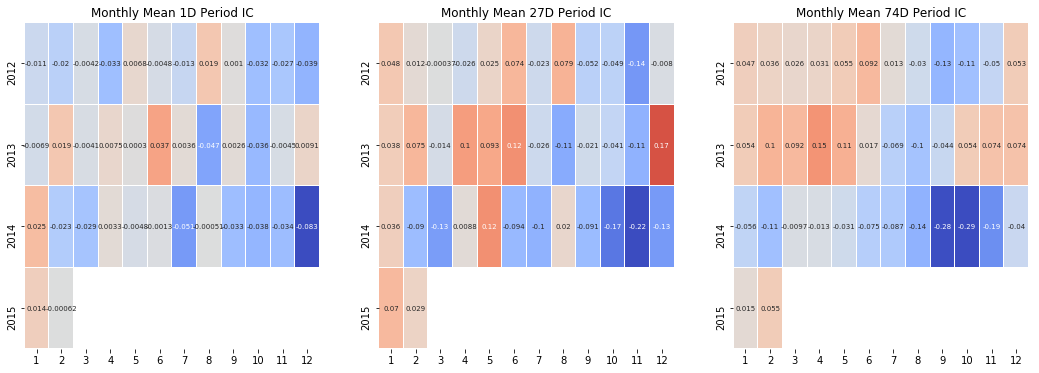

In [2]:
mean_ic_df, monthly_ic_list = ic_analysis(equity_df, price_df, factor_columns,group_column='sectorCode', periods=(1,22,66),group_adjust=True)
mean_ic_df.to_csv("factor_ic_analysis.csv")